In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
cpp = pd.read_csv("cpp.csv")
cpp

,board size,depth,execution time
0,3,1,0.001676
1,3,1,0.001048
2,3,1,0.000887
3,3,1,0.000815
4,3,1,0.000771
...,...,...,...
75,10,1,0.975928
76,10,1,0.977007
77,10,1,1.002927
78,10,1,0.970783


In [7]:
python = pd.read_csv("python.csv")
python

,board size,depth,execution time
0,3,1,0.001502
1,3,1,0.001211
2,3,1,0.001094
3,3,1,0.001029
4,3,1,0.001095
...,...,...,...
75,10,1,2.317138
76,10,1,2.351527
77,10,1,2.344618
78,10,1,2.313682


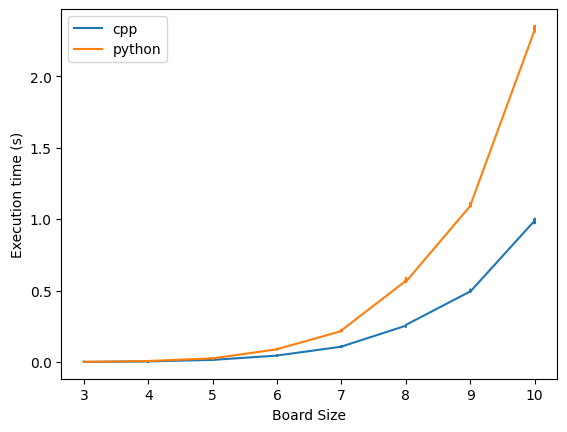

In [8]:
fig, ax = plt.subplots()
ax.plot(cpp['board size'], cpp['execution time'], label='cpp')
ax.plot(python['board size'], python['execution time'], label='python')
ax.set_xlabel('Board Size')
ax.set_ylabel('Execution time (s)')
ax.legend();
fig.savefig('Board_Size_vs_Execution_Time_Plot')